# Polynomial Regression
* The linear regression model allow us to predict future label values bases of the given set of features. But, it's limitation is that it only offerers one degree model. One way to improve the model is to consider polynomial model. 
* There are two issues polynomial regression will address for us: 
    * Non-linear features relationships to label
        * For the data that are non linear in relationship to dependant variable such as y = log(x). 
    * Interaction terms between features
        *  Let's say in last example we saw that the newspaper does not offer any benefits to sale by advertisement, but what if it serves the purpose that when TV watchers or radio listeners see or lister the commercial about our product and when they go read the newspaper and see our advertisement it help them remember about our product. 
        * The above mention problems can be solved using the polynomial regression. Simplest way is to create a new feature that multiplies two existing features together to create an interaction term. We can keep the original features (variables), and add on this interaction term. Scikit-learn does this for us easily through a preprocessing call. 
* Scikit-learn's preprocessing library contains many useful tools to apply to the original data set before model training. One tool is the Polynomial Features which automatically creates both higher order feature polynomials and the interaction terms between all features combinations. 


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("data/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)
y = df.sales

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [7]:
polynomial_converter.fit(X=X)

PolynomialFeatures(include_bias=False)

In [8]:
poly_features = polynomial_converter.transform(X)

In [9]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
test_predictions = model.predict(X_test)

In [14]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
print(f"MAE = {MAE}")
print(f"RMSE= {RMSE}")

MAE = 0.48967980448037096
RMSE= 0.6646431757269152


Based on the mean absolute errors and root mean squared errors we can predict that the polynomial model is behaving better than the linear model. 

In [18]:
# Let's compare the our test model data with the coefficients. 
print(poly_features[0])
print(model.coef_)

[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 8.697780e+03
 1.592292e+04 1.428840e+03 2.615760e+03 4.788640e+03]
[ 5.17095811e-02  1.30848864e-02  1.20000085e-02 -1.10892474e-04
  1.14212673e-03 -5.24100082e-05  3.34919737e-05  1.46380310e-04
 -3.04715806e-05]


## Bias-Variance Trade off (Overfitting versus underfitting)
* Based on the model we have ran, we can see that the polynomial function works better than the standard linear regression model. But as we know that the polynomial function means more than one degree of the function, and it becomes crucial to select which order is the right pick. 
* In general, increasing model complexity in search for better performance leads to a Bias-Variance trade-off. We want to have a model that can generalize well to new unseen data, but can also account for variance and patterns in the known data. 
* Extreme bias or extreme variance both lead to bad models. Let's see the effect by considering a model that under fits or a model that over fits. 
    * Over fitting: 
        * The model fits too much to the noise from the data, this ofter results in low error on training sets high error on test/validation sets. 
    * Under fitting:
        * Model does not capture the underlying trend of the data and does not fit the data well enough. It has a low variance but high bias. It often leads to excessively simple model.  
        * Under fitting can lead to poor performance in both training and testing data sets. 

### Adjusting model parameters 
* To choose the model that fits the perfectly to our data set we need to visualize the dataset and verify that our model is not under fitting or over fitting. 

** Even though we can achieve that by running model multiple times, what is the point of using the computer in that. We are using the machine learning to do the calculations for us, so we can achieve that by looping our model in our desired values. 

In [19]:
# Create the different order polynomial 
# Split poly feat train/test
# fit on train
# store/save the RMSE for both the train and test
# Plot the results (error va polynomial errors)

In [21]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 9):

    poly_converter = PolynomialFeatures(degree=d, include_bias=False)

    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

print(train_rmse_errors)
print(test_rmse_errors)

[1.734594124329376, 0.5879574085292232, 0.4339344356902066, 0.35170836883993517, 0.2509342951990972, 0.19940660520798886, 5.421422348088456, 0.1424969455213967]
[1.5161519375993877, 0.6646431757269152, 0.5803286825156331, 0.5077742623309994, 2.5758247707699113, 4.490840128985557, 1381.4040685804796, 4449.567305745858]


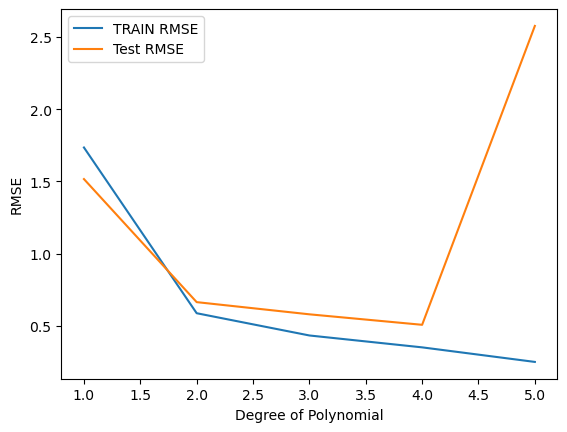

In [24]:
plt.plot(range(1, 6), train_rmse_errors[:5], label="TRAIN RMSE")
plt.plot(range(1, 6), test_rmse_errors[:5], label="Test RMSE")

plt.ylabel("RMSE")
plt.xlabel('Degree of Polynomial')
plt.legend()